<a href="https://colab.research.google.com/github/Asadali016/VGG16/blob/main/FeaturesExtractionVGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from collections import Counter
import cv2
import os
import glob
import skimage
import numpy as np
import pandas as pd
import seaborn as sn
from tqdm import tqdm
from PIL import Image
from os import listdir
import matplotlib.pyplot as plt
from skimage.transform import resize
from collections import Counter

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import AUC
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16 # VGG16
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Flatten, Activation, GlobalAveragePooling2D,Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
images=[]
labels=[]
feature_dictionary = {
    'label': tf.io.FixedLenFeature([], tf.int64),
    'label_normal': tf.io.FixedLenFeature([], tf.int64),
    'image': tf.io.FixedLenFeature([], tf.string)
    }

In [4]:
def _parse_function(example, feature_dictionary=feature_dictionary):
    parsed_example = tf.io.parse_example(example, feature_dictionary)
    return parsed_example

def read_data(filename):
    full_dataset = tf.data.TFRecordDataset(filename,num_parallel_reads=tf.data.experimental.AUTOTUNE)
    full_dataset = full_dataset.shuffle(buffer_size=31000)
    full_dataset = full_dataset.cache()
    print("Size of Training Dataset: ", len(list(full_dataset)))
    
    feature_dictionary = {
    'label': tf.io.FixedLenFeature([], tf.int64),
    'label_normal': tf.io.FixedLenFeature([], tf.int64),
    'image': tf.io.FixedLenFeature([], tf.string)
    }   

    full_dataset = full_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    print(full_dataset)
    for image_features in full_dataset:
        image = image_features['image'].numpy()
        image = tf.io.decode_raw(image_features['image'], tf.uint8)
        image = tf.reshape(image, [299, 299])        
        image=image.numpy()
        image=cv2.resize(image,(100,100))
        image=cv2.merge([image,image,image])        
        #plt.imshow(image)
        images.append(image)
        labels.append(image_features['label_normal'].numpy())


In [ ]:
filenames=['/content/drive/MyDrive/Fiverr_WORK/training10_0/training10_0.tfrecords']
for filenames in filenames:
    read_data(filenames)   
print(len(images))
print(len(labels))

Size of Training Dataset:  11177
<ParallelMapDataset element_spec={'image': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'label_normal': TensorSpec(shape=(), dtype=tf.int64, name=None)}>
11177
11177


In [ ]:
X=np.array(images)
y=np.array(labels)
print(len(X))
print(len(y))
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021,shuffle=True)

11177
11177


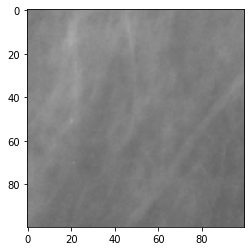

In [ ]:
plt.imshow(X[0])

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras import optimizers
from keras import losses
from sklearn import metrics

print(X[0].shape)

In [ ]:
rows, cols,color = X[0].shape
print(X[0].shape)

base_model = VGG16(input_shape=(100,100,3), weights='imagenet', include_top=False)
x = base_model.output
x = Dropout(0.2)(x)
predictions = Flatten()(x)
model_feat = Model(inputs=base_model.input,outputs=predictions)

features = model_feat.predict(X)


(100, 100, 3)
58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
import pandas as pd 
pd.DataFrame(features).to_csv('/content/drive/MyDrive/Fiverr_WORK/features.csv')

In [ ]:
import pandas as pd  
features1= pd.read_csv('/content/drive/MyDrive/Fiverr_WORK/features.csv')
print(len(features1))
print(len(y))
features1['label'] = y
pd.DataFrame(features1).to_csv('/content/drive/MyDrive/Fiverr_WORK/features.csv')


11177
11177


In [7]:
import pandas as pd
dataset=pd.read_csv('/content/drive/MyDrive/Fiverr_WORK/features.csv')

In [8]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25, random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(X_train,Y_train)

In [14]:
Y_pred=classifier.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[2229  246]
 [ 152  168]]


In [15]:
ac=accuracy_score(Y_test,Y_pred)
print(ac)

0.857602862254025
